### Task 3: Nobel Prize Distribution
### Author: Tejaswini Raghavendra Kamath
### TechEdu Learning and Talent Solutions : TechEdu's Internship Program Data Science (TIP2021 October)

- Perform following operations on given data set
- Find out the age group which received the most number of
nobel prizes.
- Find the trends in number of nobel prizes received by each
category in during 1900 to 2020
- Find out and plot which continent is having most number of
nobel prize recipients
- Find out how many Nobel prize recipients are still alive.
- Dataset Link : https://bit.ly/3n7Y76C

## 1. Data Sourcing

In [1]:
# Import Libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
nobel = pd.read_csv("nobel_prize_by_winner.csv")
nobel.head(10)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
5,428,Barbara,McClintock,6/16/1902,9/2/1992,USA,US,"Hartford, CT",USA,US,"Huntington, NY",female,1983.0,medicine,NaN,1.0,"""for her discovery of mobile genetic elements""",Cold Spring Harbor Laboratory,"Cold Spring Harbor, NY",USA
6,773,Shirin,Ebadi,6/21/1947,0000-00-00,Iran,IR,Hamadan,NaN,NaN,NaN,female,2003.0,peace,NaN,1.0,"""for her efforts for democracy and human right...",NaN,NaN,NaN
7,597,Grazia,Deledda,09/27/1871,8/15/1936,Italy,IT,"Nuoro, Sardinia",Italy,IT,Rome,female,1926.0,literature,NaN,1.0,"""for her idealistically inspired writings whic...",NaN,NaN,NaN
8,615,Gabriela,Mistral,04/07/1889,1/10/1957,Chile,CL,Vicu_a,USA,US,"Hempstead, NY",female,1945.0,literature,NaN,1.0,"""for her lyric poetry which, inspired by power...",NaN,NaN,NaN
9,782,Elfriede,Jelinek,10/20/1946,0000-00-00,Austria,AT,M�rzzuschlag,NaN,NaN,NaN,female,2004.0,literature,NaN,1.0,"""for her musical flow of voices and counter-vo...",NaN,NaN,NaN


## 2. Data Cleaning 

1. Analyzing columns for missing data. Dropping columns as required with respect to missing data percentage
2. Imputing incorrect values
3. Handling missing values with very few nulls
4. Fixing rows and columns as per data required for analysis
5. Binning the Continuous Variables

Expected output: Final dataset for analysis

In [3]:
# checking the structure of the dataset
nobel.shape

(972, 20)

In [4]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 972 non-null    int64  
 1   firstname          966 non-null    object 
 2   surname            936 non-null    object 
 3   born               946 non-null    object 
 4   died               946 non-null    object 
 5   bornCountry        940 non-null    object 
 6   bornCountryCode    940 non-null    object 
 7   bornCity           938 non-null    object 
 8   diedCountry        601 non-null    object 
 9   diedCountryCode    600 non-null    object 
 10  diedCity           595 non-null    object 
 11  gender             972 non-null    object 
 12  year               966 non-null    float64
 13  category           966 non-null    object 
 14  overallMotivation  16 non-null     object 
 15  share              966 non-null    float64
 16  motivation         878 non

In [5]:
nobel.describe()

,id,year,share
count,972.000000,966.000000,966.000000
mean,471.365226,1970.145963,2.005176
std,275.012711,32.889742,0.930193
min,1.000000,1901.000000,1.000000
25%,230.750000,1947.000000,1.000000
50%,463.500000,1976.000000,2.000000
75%,720.250000,1999.000000,3.000000
max,934.000000,2016.000000,4.000000


In [6]:
nobel.isnull().sum()

id                     0
firstname              6
surname               36
born                  26
died                  26
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
dtype: int64

In [7]:
# function to find the % of null values in a column. This is shown in the descending order.

def findnull(df):
    totalnull = df.isnull().sum().sort_values(ascending = False)
    percentnull = (df.isnull().sum()/len(df.index)*100).sort_values(ascending = False)
    nullinfo = pd.concat([totalnull,percentnull],axis=1)
    colnames = ['Total','%']
    nullinfo.columns = colnames
    return nullinfo

# Fetching the 60 top columns
findnull(nobel)

,Total,%
overallMotivation,956,98.353909
diedCity,377,38.786008
diedCountryCode,372,38.271605
diedCountry,371,38.168724
city,258,26.543210
country,258,26.543210
name,252,25.925926
motivation,94,9.670782
surname,36,3.703704
bornCity,34,3.497942


In [8]:
nobel[~nobel['overallMotivation'].isnull()]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
67,727,Herbert,Kroemer,8/25/1928,0000-00-00,Germany,DE,Weimar,NaN,NaN,NaN,male,2000.0,physics,"""for basic work on information and communicati...",4.0,"""for developing semiconductor heterostructures...",University of California,"Santa Barbara, CA",USA
68,726,Zhores I.,Alferov,3/15/1930,0000-00-00,USSR (now Belarus),BY,"Vitebsk, Belorussia",NaN,NaN,NaN,male,2000.0,physics,"""for basic work on information and communicati...",4.0,"""for developing semiconductor heterostructures...",A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia
151,758,Kurt,W�thrich,10/4/1938,0000-00-00,Switzerland,CH,Aarberg,NaN,NaN,NaN,male,2002.0,chemistry,"""for the development of methods for identifica...",2.0,"""for his development of nuclear magnetic reson...",The Scripps Research Institute,"La Jolla, CA",USA
152,758,Kurt,W�thrich,10/4/1938,0000-00-00,Switzerland,CH,Aarberg,NaN,NaN,NaN,male,2002.0,chemistry,"""for the development of methods for identifica...",2.0,"""for his development of nuclear magnetic reson...",Eidgen_ssische Technische Hochschule (Swiss Fe...,Zurich,Switzerland
225,279,Michael,Smith,4/26/1932,10/4/2000,United Kingdom,GB,Blackpool,Canada,CA,Vancouver,male,1993.0,chemistry,"""for contributions to the developments of meth...",2.0,"""for his fundamental contributions to the esta...",University of British Columbia,Vancouver,Canada
241,278,Kary B.,Mullis,12/28/1944,0000-00-00,USA,US,"Lenoir, NC",NaN,NaN,NaN,male,1993.0,chemistry,"""for contributions to the developments of meth...",2.0,"""for his invention of the polymerase chain rea...",NaN,"La Jolla, CA",USA
268,728,Jack S.,Kilby,11/8/1923,6/20/2005,USA,US,"Jefferson City, MO",USA,US,"Dallas, TX",male,2000.0,physics,"""for basic work on information and communicati...",2.0,"""for his part in the invention of the integrat...",Texas Instruments,"Dallas, TX",USA
357,770,Roderick,MacKinnon,2/19/1956,0000-00-00,USA,US,"Burlington, MA",NaN,NaN,NaN,male,2003.0,chemistry,"""for discoveries concerning channels in cell m...",2.0,"""for structural and mechanistic studies of ion...",Rockefeller University,"New York, NY",USA
358,770,Roderick,MacKinnon,2/19/1956,0000-00-00,USA,US,"Burlington, MA",NaN,NaN,NaN,male,2003.0,chemistry,"""for discoveries concerning channels in cell m...",2.0,"""for structural and mechanistic studies of ion...",Howard Hughes Medical Institute,NaN,NaN
380,148,Frederick,Reines,3/16/1918,8/26/1998,USA,US,"Paterson, NJ",USA,US,"Orange, CA",male,1995.0,physics,"""for pioneering experimental contributions to ...",2.0,"""for the detection of the neutrino""",University of California,"Irvine, CA",USA


With over 98% data missing and overallMotivation appearing to be the same as motivation for the non-Null data, dropping the column.


In [9]:
nobel.drop('overallMotivation',axis=1,inplace=True)

In [10]:
nobel.shape

(972, 19)

In [11]:
nobel[nobel.year.isnull()]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
897,897,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,898,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,899,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,900,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,901,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,902,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There appears to be some incorrect data where no data is entered for ids 897-902 except that gender is male. Dropping these rows.

In [12]:
nobel = nobel[~nobel['year'].isnull()]
nobel.shape

(966, 19)

In [13]:
findnull(nobel)

,Total,%
diedCity,371,38.405797
diedCountryCode,366,37.888199
diedCountry,365,37.784679
city,252,26.086957
country,252,26.086957
name,246,25.465839
motivation,88,9.109731
surname,30,3.105590
bornCity,28,2.898551
bornCountry,26,2.691511


In [14]:
nobel[nobel.born.isnull()]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
946,925,National Dialogue Quartet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2015.0,peace,1.0,"""for its decisive contribution to the building...",NaN,NaN,NaN
947,893,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2013.0,peace,1.0,"""for its extensive efforts to eliminate chemic...",NaN,NaN,NaN
948,881,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2012.0,peace,1.0,"""for over six decades contributed to the advan...",NaN,NaN,NaN
949,818,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2007.0,peace,2.0,"""for their efforts to build up and disseminate...",NaN,NaN,NaN
950,810,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2006.0,peace,2.0,"""for their efforts to create economic and soci...",NaN,NaN,NaN
951,561,Pugwash Conferences on Science and World Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1995.0,peace,2.0,"""for their efforts to diminish the part played...",NaN,NaN,NaN
952,797,International Atomic Energy Agency (IAEA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2005.0,peace,2.0,"""for their efforts to prevent nuclear energy f...",NaN,NaN,NaN
953,748,United Nations (U.N.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2001.0,peace,2.0,"""for their work for a better organized and mor...",NaN,NaN,NaN
954,564,International Campaign to Ban Landmines (ICBL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1997.0,peace,2.0,"""for their work for the banning and clearing o...",NaN,NaN,NaN
955,568,M_decins Sans Fronti�res,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1999.0,peace,1.0,"""in recognition of the organization's pioneeri...",NaN,NaN,NaN


In [15]:
len(nobel[nobel.born.isnull()])

26

In [16]:
nobel[nobel.gender=='org']

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
946,925,National Dialogue Quartet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2015.0,peace,1.0,"""for its decisive contribution to the building...",NaN,NaN,NaN
947,893,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2013.0,peace,1.0,"""for its extensive efforts to eliminate chemic...",NaN,NaN,NaN
948,881,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2012.0,peace,1.0,"""for over six decades contributed to the advan...",NaN,NaN,NaN
949,818,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2007.0,peace,2.0,"""for their efforts to build up and disseminate...",NaN,NaN,NaN
950,810,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2006.0,peace,2.0,"""for their efforts to create economic and soci...",NaN,NaN,NaN
951,561,Pugwash Conferences on Science and World Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1995.0,peace,2.0,"""for their efforts to diminish the part played...",NaN,NaN,NaN
952,797,International Atomic Energy Agency (IAEA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2005.0,peace,2.0,"""for their efforts to prevent nuclear energy f...",NaN,NaN,NaN
953,748,United Nations (U.N.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2001.0,peace,2.0,"""for their work for a better organized and mor...",NaN,NaN,NaN
954,564,International Campaign to Ban Landmines (ICBL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1997.0,peace,2.0,"""for their work for the banning and clearing o...",NaN,NaN,NaN
955,568,M_decins Sans Fronti�res,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1999.0,peace,1.0,"""in recognition of the organization's pioneeri...",NaN,NaN,NaN


In [17]:
len(nobel[nobel.gender=='org'])

26

It can be observed that 26 rows 946-971 are not individuals but organizations which is why they do not have any birth or death information like date/city/country. This makes it logical for the values to be NA.


In [18]:
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


Creating columns to get age of person when they received the award.

In [19]:
nobel['born'].value_counts()

0000/00/00    11
11/9/1952      3
3/15/1930      3
03/23/1881     3
3/7/1938       3
              ..
11/30/1926     1
10/16/1863     1
06/07/1896     1
8/23/1924      1
7/16/1926      1
Name: born, Length: 858, dtype: int64

In [20]:
nobel[nobel['born']=='0000/00/00']

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
173,927,Yoshinori,Ohsumi,0000/00/00,0000-00-00,Japan,JP,Fukuoka,NaN,NaN,NaN,male,2016.0,medicine,1.0,"""for his discoveries of mechanisms for autophagy""",Tokyo Institute of Technology,Tokyo,Japan
291,934,Juan Manuel,Santos,0000/00/00,0000-00-00,Colombia,CO,Bogot�,NaN,NaN,NaN,male,2016.0,peace,1.0,"""for his resolute efforts to bring the country...",NaN,NaN,NaN
362,841,Venkatraman,Ramakrishnan,0000/00/00,0000-00-00,India,IN,"Chidambaram, Tamil Nadu",NaN,NaN,NaN,male,2009.0,chemistry,3.0,"""for studies of the structure and function of ...",MRC Laboratory of Molecular Biology,Cambridge,United Kingdom
377,932,Sir J. Fraser,Stoddart,0000/00/00,0000-00-00,United Kingdom,GB,Edinburgh,NaN,NaN,NaN,male,2016.0,chemistry,3.0,"""for the design and synthesis of molecular mac...",Northwestern University,"Evanston, IL",USA
378,933,Bernard L.,Feringa,0000/00/00,0000-00-00,the Netherlands,NL,Barger-Compascuum,NaN,NaN,NaN,male,2016.0,chemistry,3.0,"""for the design and synthesis of molecular mac...",University of Groningen,Groningen,the Netherlands
379,931,Jean-Pierre,Sauvage,0000/00/00,0000-00-00,France,FR,Paris,NaN,NaN,NaN,male,2016.0,chemistry,3.0,"""for the design and synthesis of molecular mac...",University of Strasbourg,Strasbourg,France
444,864,Saul,Perlmutter,0000/00/00,0000-00-00,USA,US,"Champaign-Urbana, IL",NaN,NaN,NaN,male,2011.0,physics,2.0,"""for the discovery of the accelerating expansi...",Lawrence Berkeley National Laboratory,"Berkeley, CA",USA
445,864,Saul,Perlmutter,0000/00/00,0000-00-00,USA,US,"Champaign-Urbana, IL",NaN,NaN,NaN,male,2011.0,physics,2.0,"""for the discovery of the accelerating expansi...",University of California,"Berkeley, CA",USA
800,929,F. Duncan M.,Haldane,0000/00/00,0000-00-00,United Kingdom,GB,London,NaN,NaN,NaN,male,2016.0,physics,4.0,"""for theoretical discoveries of topological ph...",Princeton University,"Princeton, NJ",USA
801,930,J. Michael,Kosterlitz,0000/00/00,0000-00-00,United Kingdom,GB,Aberdeen,NaN,NaN,NaN,male,2016.0,physics,4.0,"""for theoretical discoveries of topological ph...",Brown University,"Providence, RI",USA


In [21]:
nobel['died'].value_counts()

0000-00-00    328
9/8/1985        3
6/12/2012       3
8/12/1973       2
2/1/1976        2
             ... 
2/15/1959       1
6/11/2013       1
5/27/2010       1
10/17/1934      1
2/1/1958        1
Name: died, Length: 577, dtype: int64

In [22]:
nobel[nobel['died']=='0000-00-00'].head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
6,773,Shirin,Ebadi,6/21/1947,0000-00-00,Iran,IR,Hamadan,NaN,NaN,NaN,female,2003.0,peace,1.0,"""for her efforts for democracy and human right...",NaN,NaN,NaN
9,782,Elfriede,Jelinek,10/20/1946,0000-00-00,Austria,AT,M�rzzuschlag,NaN,NaN,NaN,female,2004.0,literature,1.0,"""for her musical flow of voices and counter-vo...",NaN,NaN,NaN
10,553,Aung San Suu Kyi,NaN,6/19/1945,0000-00-00,Burma (now Myanmar),MM,Rangoon (now Yangon),NaN,NaN,NaN,female,1991.0,peace,1.0,"""for her non-violent struggle for democracy an...",NaN,NaN,NaN
12,924,Svetlana,Alexievich,5/31/1948,0000-00-00,Ukraine,UA,Ivano-Frankivsk,NaN,NaN,NaN,female,2015.0,literature,1.0,"""for her polyphonic writings, a monument to su...",NaN,NaN,NaN


In [23]:
nobel['born'] = nobel['born'].replace('0000/00/00',np.nan)
nobel['died'] = nobel['died'].replace('0000-00-00',np.nan)

In [24]:
nobel['born'].value_counts()

03/23/1881    3
11/9/1952     3
3/15/1930     3
3/7/1938      3
3/24/1903     2
             ..
10/16/1863    1
06/07/1896    1
8/23/1924     1
4/18/1940     1
7/16/1926     1
Name: born, Length: 857, dtype: int64

In [25]:
nobel['died'].value_counts()

6/12/2012     3
9/8/1985      3
9/8/1965      2
11/21/1996    2
8/12/1955     2
             ..
4/2/1995      1
2/15/1959     1
6/11/2013     1
5/27/2010     1
2/1/1958      1
Name: died, Length: 576, dtype: int64

In [26]:
findnull(nobel)

,Total,%
diedCity,371,38.405797
diedCountryCode,366,37.888199
diedCountry,365,37.784679
died,354,36.645963
city,252,26.086957
country,252,26.086957
name,246,25.465839
motivation,88,9.109731
born,37,3.830228
surname,30,3.105590


In [27]:
nobel=nobel.reset_index(drop=True)

### Age groups with most awards

In [28]:
for i in range(len(nobel['born'])):
    print(i,end=',')
    print(nobel['firstname'][i],end=",")
    print(nobel['born'][i])

0,Elinor,8/7/1933
1,Elinor,8/7/1933
2,Wangari Muta,4/1/1940
3,Dorothy Crowfoot,5/12/1910
4,Youyou,12/30/1930
5,Barbara,6/16/1902
6,Shirin,6/21/1947
7,Grazia,09/27/1871
8,Gabriela,04/07/1889
9,Elfriede,10/20/1946
10,Aung San Suu Kyi,6/19/1945
11,Nelly,12/10/1891
12,Svetlana,5/31/1948
13,Pearl,06/26/1892
14,Wislawa,7/2/1923
15,Ada E.,6/22/1939
16,Rosalyn,7/19/1921
17,Carol W.,4/15/1961
18,Elizabeth H.,11/26/1948
19,Maria,6/28/1906
20,Christiane,10/20/1942
21,May-Britt,1/4/1963
22,Rita,4/22/1909
23,Gertrude B.,1/23/1918
24,Linda B.,1/29/1947
25,Fran�oise,7/30/1947
26,Gerty Theresa,08/15/1896
27,Ellen,10/29/1938
28,Leymah,2/1/1972
29,Tawakkol,2/7/1979
30,Malala,7/12/1997
31,Jody,10/9/1950
32,Selma Ottilia Lovisa,11/20/1858
33,Marie,11/07/1867
34,Rigoberta,1/9/1959
35,Marie,11/07/1867
36,Ir�ne,09/12/1897
37,Alice,7/10/1931
38,Sigrid,05/20/1882
39,Doris,10/22/1919
40,Toni,2/18/1931
41,Nadine,11/19/1923
42,Herta,8/17/1953
43,Betty,5/22/1943
44,Mairead,1/27/1944
45,Alva,1/31/1902
46,Mother Ter

551,Satoshi,7/12/1935
552,Andr_,5/8/1902
553,Jacques,2/9/1910
554,Fran�ois,6/17/1920
555,Sydney,1/13/1927
556,John E.,3/27/1942
557,H. Robert,5/8/1947
558,George D.,12/19/1903
559,Baruj,10/29/1920
560,Jean,10/19/1916
561,Werner,8/29/1904
562,Werner,8/29/1904
563,Andr_ Fr_d_ric,09/24/1895
564,Dickinson W.,10/30/1895
565,Torsten N.,6/3/1924
566,David H.,2/27/1926
567,William Parry,02/06/1892
568,George Richards,12/02/1885
569,William Parry,02/06/1892
570,George Hoyt,08/28/1878
571,Sir Peter,10/9/1933
572,Paul C.,5/6/1929
573,D. Carleton,9/9/1923
574,Baruch S.,7/28/1925
575,Robert F.,6/4/1916
576,Ferid,9/14/1936
577,Louis J.,5/31/1941
578,J. Hans D.,6/25/1907
579,Joseph E.,4/1/1919
580,E. Donnall,3/15/1920
581,Konrad,11/7/1903
582,Karl,11/20/1886
583,Nikolaas,4/15/1907
584,John R.,3/29/1927
585,Bengt I.,5/21/1934
586,Sune K.,1/10/1916
587,Edwin G.,6/6/1918
588,Edmond H.,4/6/1920
589,Arvid,1/25/1923
590,Paul,12/11/1925
591,Eric R.,11/7/1929
592,Bruce A.,12/29/1957
593,Bruce A.,12/29/1957
5

In [29]:
nobel['year']=nobel['year'].astype(int)
nobel['year'].head()

0    2009
1    2009
2    2004
3    1964
4    2015
Name: year, dtype: int32

In [30]:
nobelAge = nobel[~nobel['born'].isnull()]
nobelAge.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [31]:
nobelAge=nobelAge.reset_index(drop=True)
nobelAge['bornYear']=nobelAge['year']
for i in range(len(nobelAge)):
    nobelAge['bornYear'][i]=nobelAge['born'][i][-4:]
#     nobelAge['age'][i]=int(nobelAge['year'][i])-int(nobelAge['bornYear'][i])
nobelAge['bornYear']=nobelAge['bornYear'].astype(int)
nobelAge['year']=nobelAge['year'].astype(int)
nobelAge.head()


,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country,bornYear
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,1933
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,1933
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,1940
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom,1910
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1930


In [32]:
nobelAge['Age']=nobelAge['year']
nobelAge.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,share,motivation,name,city,country,bornYear,Age
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,1933,2009
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,1933,2009
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,...,female,2004,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,1940,2004
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,...,female,1964,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom,1910,1964
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,...,female,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1930,2015


In [33]:
for i in range(len(nobelAge)):
    nobelAge['Age'][i]=(nobelAge['year'][i]-nobelAge['bornYear'][i])
nobelAge.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,share,motivation,name,city,country,bornYear,Age
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,1933,76
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,1933,76
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,...,female,2004,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,1940,64
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,...,female,1964,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom,1910,54
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,...,female,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1930,85


In [34]:
max(nobelAge.Age)

90

In [35]:
# Creating bins for age groups
nobelAge['ageGroups']= pd.cut(nobelAge.Age,[0,30,40,50,60,70,80,90,100],
                             labels=['<30','30-40','40-50','50-60','60-70','70-80','80-90','90+'])



In [36]:
nobelAge.ageGroups.value_counts()

60-70    255
50-60    252
40-50    177
70-80    146
30-40     60
80-90     37
<30        2
90+        0
Name: ageGroups, dtype: int64

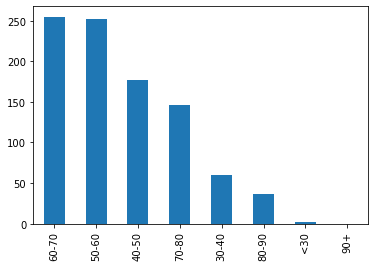

In [37]:
nobelAge.ageGroups.value_counts().plot.bar();


As can be observed, 
- Most of the individual award winners are in the age range 60-70 followed closely by the age range 50-60.
- Very few Nobel awardees are in the age ranges below age 30 
- No awardees have been over the age of 90.

### Award Trends

In [44]:
nobel.category.value_counts()

medicine      227
physics       222
chemistry     194
peace         130
literature    112
economics      81
Name: category, dtype: int64

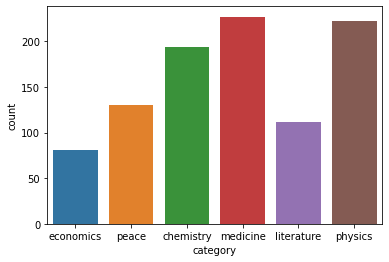

In [45]:
sns.countplot( x = 'category' ,data=nobel);

It can be observed that highest recipients of the awards are for categories medicine followed by physics.

category    ageGroups
chemistry   <30           0
            30-40        12
            40-50        44
            50-60        59
            60-70        49
            70-80        20
            80-90         6
            90+           0
economics   <30           0
            30-40         0
            40-50         0
            50-60        14
            60-70        42
            70-80        20
            80-90         5
            90+           0
literature  <30           0
            30-40         0
            40-50        10
            50-60        34
            60-70        31
            70-80        33
            80-90         4
            90+           0
medicine    <30           0
            30-40        12
            40-50        51
            50-60        72
            60-70        60
            70-80        22
            80-90         9
            90+           0
peace       <30           1
            30-40         7
            40-50        1

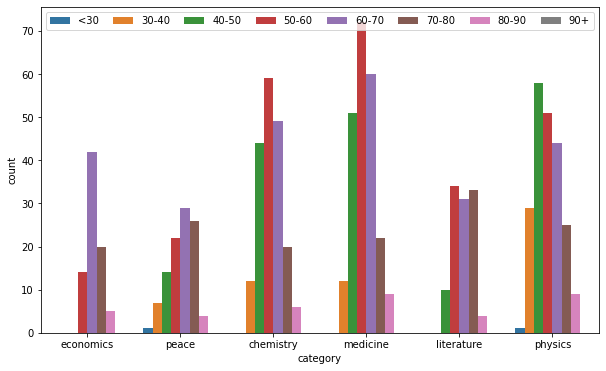

In [38]:
# Checking for category-wise age distribution
print(nobelAge.groupby(['category','ageGroups'])['id'].count())

plt.figure(figsize=(10,6))
sns.countplot( x = 'category',hue='ageGroups' ,data=nobelAge)
plt.legend(loc="upper left", mode = "expand", ncol = 8);


- It can be seen that the most recipients are in the age group 50-60 in the category of medicine. 
- The youngest recipients in the age group under 30 appear to have been in the category of peace and physics while the oldest awardees i.e. between 80-90 appear to have received awards the most number of times for medicine and physics.

In [39]:
nobel['Count']=1
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,name,city,country,Count
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,1
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,1
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,1
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom,1
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1


In [40]:
nobel.category.value_counts()

medicine      227
physics       222
chemistry     194
peace         130
literature    112
economics      81
Name: category, dtype: int64

In [41]:
nobelCats=nobel.groupby(by=['category','year','gender'])['Count'].sum()
nobelCats

category   year  gender
chemistry  1901  male      1
           1902  male      1
           1903  male      1
           1904  male      1
           1905  male      1
                          ..
physics    2012  male      4
           2013  male      2
           2014  male      4
           2015  male      2
           2016  male      3
Name: Count, Length: 603, dtype: int64

In [42]:
nobel.gender.value_counts(normalize=True)

male      0.921325
female    0.051760
org       0.026915
Name: gender, dtype: float64

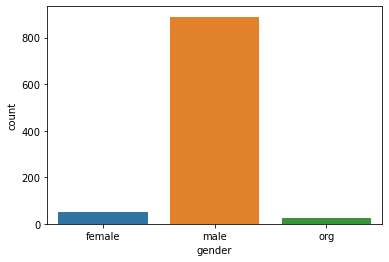

In [43]:
sns.countplot(nobel.gender,);

It can be observed that the highest recipients of the awards are males making up over 92% of the awardees.

In [46]:
# Checking for gender-wise category distribution
nobel.groupby(['category','gender'])['Count'].sum()

category    gender
chemistry   female      4
            male      190
economics   female      2
            male       79
literature  female     14
            male       98
medicine    female     12
            male      215
peace       female     16
            male       88
            org        26
physics     female      2
            male      220
Name: Count, dtype: int64

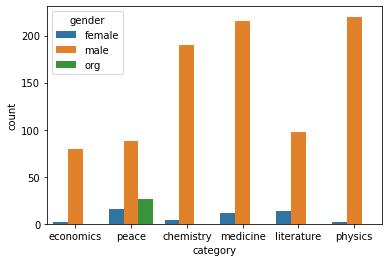

In [47]:
sns.countplot( x = 'category',hue='gender' ,data=nobel);

It can be oberved that in case of gender-wise recipients of awards for different categories:
- male recipients are highest for the category physics followed by medicine .
- highest female recipients are in the category peace followed by literature.
- organizations have been awarded the Nobel Prize only in the category of peace.

1.0    350
2.0    326
3.0    225
4.0     65
Name: share, dtype: int64


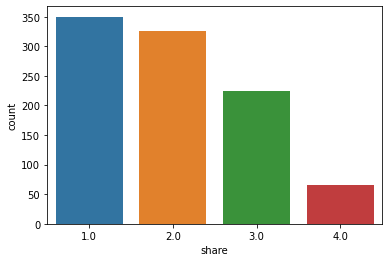

In [48]:
# Checking for any insights in relation to prize-sharing
print(nobel.share.value_counts())
sns.countplot( x = 'share' ,data=nobel);

In most cases, awards are not shared by multiple recipients.

category    share
chemistry   1.0       67
            2.0       59
            3.0       54
            4.0       14
economics   1.0       24
            2.0       38
            3.0       19
literature  1.0      104
            2.0        8
medicine    1.0       40
            2.0       77
            3.0       93
            4.0       17
peace       1.0       66
            2.0       58
            3.0        6
physics     1.0       49
            2.0       86
            3.0       53
            4.0       34
Name: Count, dtype: int64


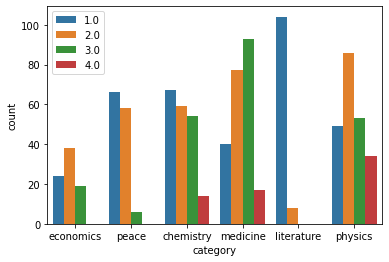

In [49]:
# Checking for category-wise prize sharing
print(nobel.groupby(['category','share'])['Count'].sum())
sns.countplot( x = 'category',hue='share' ,data=nobel)
plt.legend(loc='upper left');


It can be observed that:
- awards are least likely to be shared by recipients in the field of literature.
- the highest number of awards shared by 2 recipients is in the category of physics, that for 3 recipients is medicine and that for 4 recipeints is again physics.

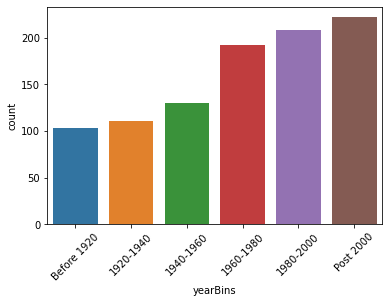

In [50]:
# Creating the Bins for the year Column
nobel['yearBins']=pd.cut(nobel.year,[1900,1920,1940,1960,1980,2000,2030],
                  labels=['Before 1920','1920-1940','1940-1960','1960-1980','1980-2000','Post 2000'])
sns.countplot(x='yearBins',data=nobel)
plt.xticks(rotation=45);

It appears that the number of awards being awarded are steadily increasing over periods of 2 decades(20 years).

category    yearBins   
chemistry   Before 1920    18
            1920-1940      27
            1940-1960      25
            1960-1980      33
            1980-2000      41
            Post 2000      50
economics   Before 1920     0
            1920-1940       0
            1940-1960       0
            1960-1980      18
            1980-2000      28
            Post 2000      35
literature  Before 1920    20
            1920-1940      18
            1940-1960      17
            1960-1980      22
            1980-2000      20
            Post 2000      15
medicine    Before 1920    19
            1920-1940      25
            1940-1960      40
            1960-1980      52
            1980-2000      44
            Post 2000      47
peace       Before 1920    22
            1920-1940      19
            1940-1960      16
            1960-1980      22
            1980-2000      28
            Post 2000      23
physics     Before 1920    24
            1920-1940      22
            1940

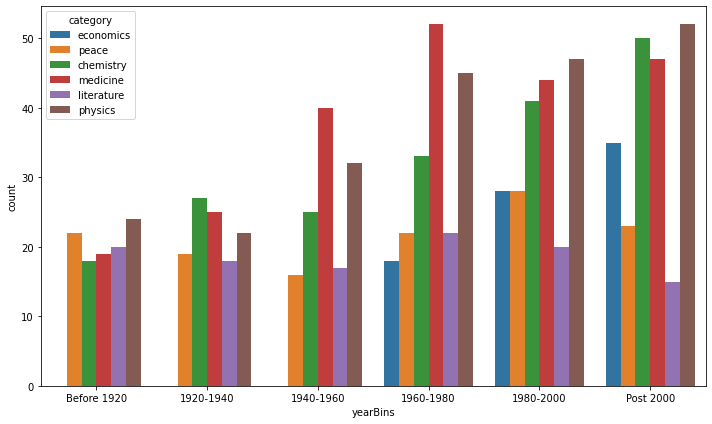

In [142]:
print(nobel.groupby(['category','yearBins'])['id'].count())
plt.figure(figsize=(10,6))
sns.countplot(x='yearBins',hue='category',data=nobel);
# plt.xticks(rotation=45);

Initially, there appear to have been only 5 award categories:
1. peace
2. chemistry
3. medicine
4. literature
5. physics

The category of economics has been introduced in the decade 1960-1980 with steady growth in the number of recipients over the 2 decade periods.
<br>The category chemistry appears to have had steady growth in number of recipients except in the period 1940-1960. Similarly, the category physics also showed a slight decline in number of recipients in the period 1920-1960 but a steady increase otherwise.
<br>The category medicine had the most recipients in the period 1960-1980.

category    yearBins   
chemistry   Before 1920    1
            1920-1940      1
            1940-1960      0
            1960-1980      1
            1980-2000      0
            Post 2000      1
economics   Before 1920    0
            1920-1940      0
            1940-1960      0
            1960-1980      0
            1980-2000      0
            Post 2000      2
literature  Before 1920    1
            1920-1940      3
            1940-1960      1
            1960-1980      1
            1980-2000      3
            Post 2000      5
medicine    Before 1920    0
            1920-1940      0
            1940-1960      1
            1960-1980      1
            1980-2000      4
            Post 2000      6
peace       Before 1920    1
            1920-1940      1
            1940-1960      1
            1960-1980      3
            1980-2000      4
            Post 2000      6
physics     Before 1920    1
            1920-1940      0
            1940-1960      0
            1960-19

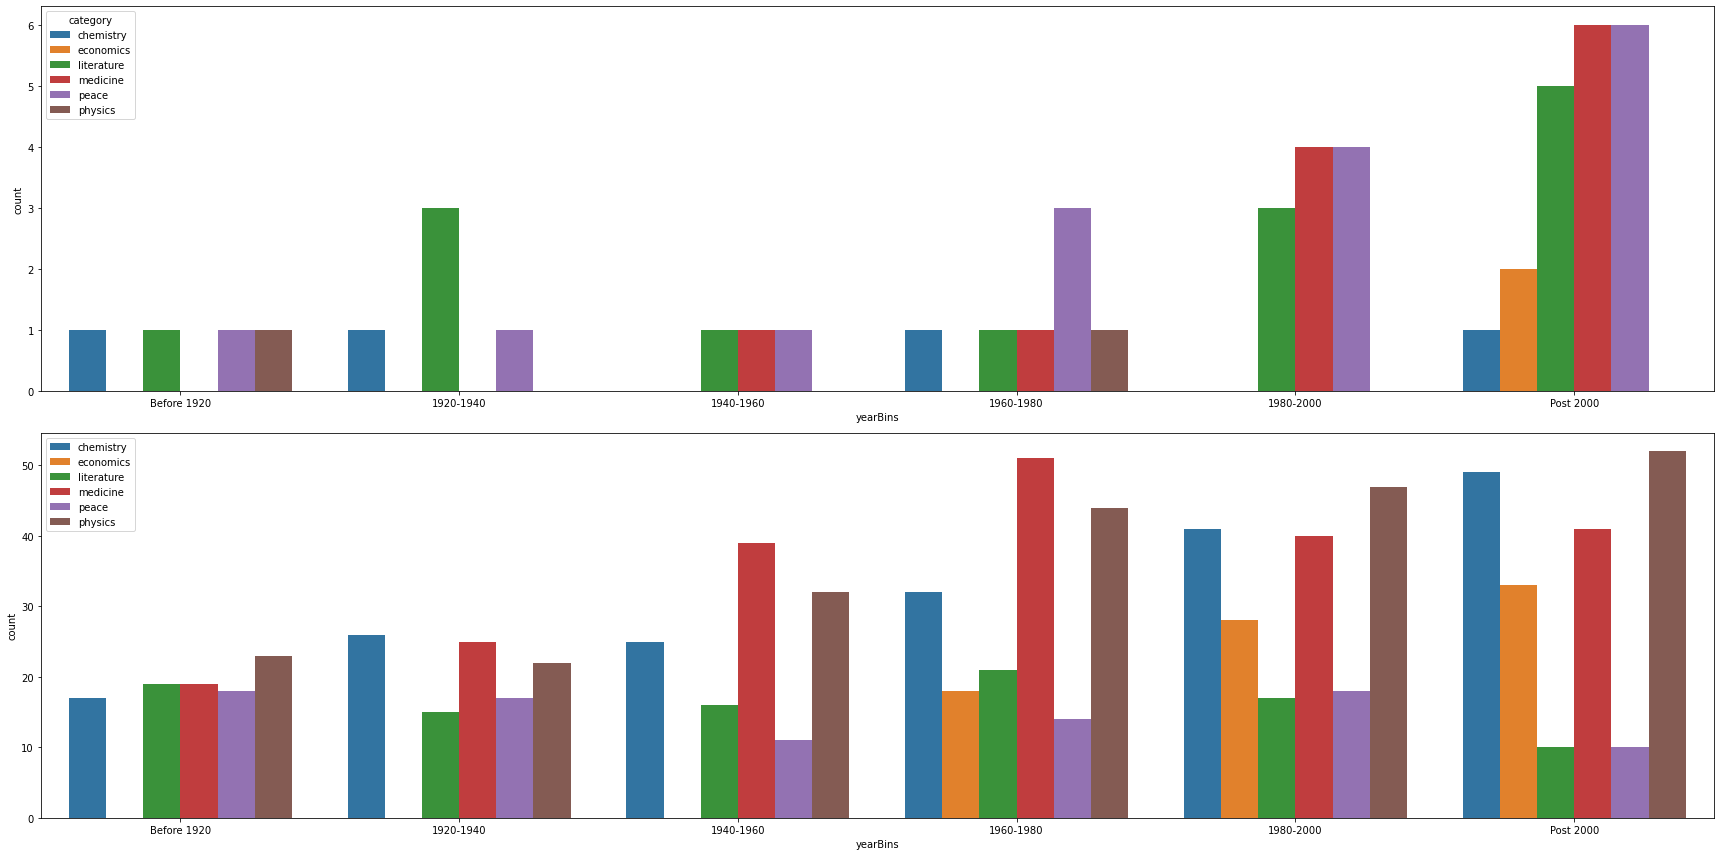

In [141]:
print(nobel[nobel['gender']=='female'].groupby(['category','yearBins'])['id'].count())
print(nobel[nobel['gender']=='male'].groupby(['category','yearBins'])['id'].count())
# plt.figure(figsize=(10,6))
f,axes = plt.subplots(2,1,figsize=(24,12))
ax1=sns.countplot(x='yearBins',hue_order = ['chemistry', 'economics', 'literature', 'medicine','peace','physics'],hue='category',data=nobel[nobel['gender']=='female'],ax=axes[0])
ax2=sns.countplot(x='yearBins',hue_order = ['chemistry', 'economics', 'literature', 'medicine','peace','physics'],hue='category',data=nobel[nobel['gender']=='male'],ax=axes[1])
ax2.legend(loc='upper left');
# plt.xticks(rotation=45);

- Female recipients have received awards in economics only post 2000 despite the category being added in the 1960-1980 period itself.
- While female recipients have shown a growing trend for peace category with the highest post 2000, male recipients have had the least recipients in the category during the same period.
- While female recipients have received almost least awards in literature only post 2000, male recipients have had the least recipients in the category during the same period.
- Females have been recipients in the category physics only in the periods before 1920 and between 1960-1980.
- There had been no female recipients in the category chemistry in the periods 1940-1960 and 1980-2000.

### Country with highest Nobel awardees

USA                                  361
United Kingdom                        91
Germany                               51
France                                40
Federal Republic of Germany           26
Switzerland                           22
Japan                                 18
Sweden                                17
the Netherlands                       11
USSR                                  11
Denmark                                9
Canada                                 7
Italy                                  6
Belgium                                6
Australia                              6
Austria                                6
Israel                                 5
Norway                                 5
Russia                                 3
Portugal                               2
Argentina                              2
China                                  2
Hungary                                1
Spain                                  1
Finland         

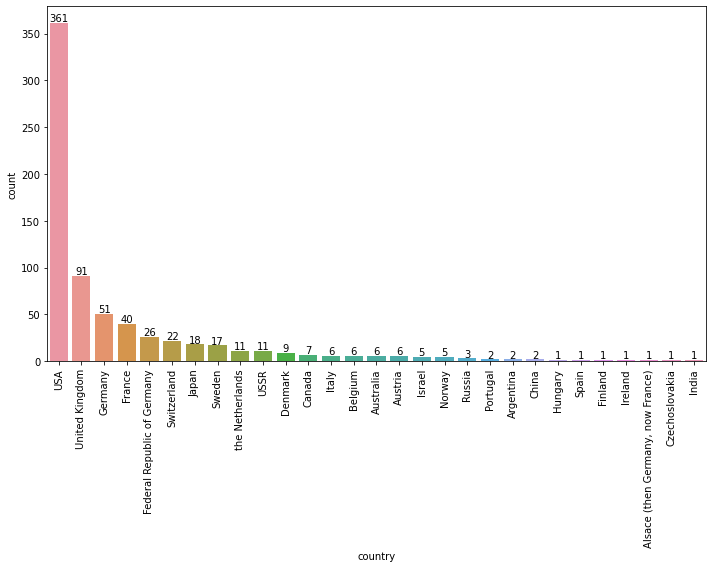

In [137]:
print(nobel.country.value_counts())
plt.figure(figsize=(10,8))
ax= sns.countplot(x=nobel.country,order=nobel.country.value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+5), ha='center', va='center', color='black', size=10)
plt.show()

In [54]:
nobel['continent']=nobel.country
nobel['continent'].replace(['USA','Canada'],'North America',inplace=True)
nobel['continent'].replace(['United Kingdom','Germany','France','Federal Republic of Germany','Switzerland','Sweden',
                            'the Netherlands','Denmark','Italy','Belgium','Austria','Norway','Portugal','Finland',
                            'Czechoslovakia','Spain','Alsace (then Germany, now France)','Ireland','Hungary'],
                           'Europe',inplace=True)
nobel['continent'].replace(['Japan','Israel','China','India'],'Asia',inplace=True)
nobel['continent'].replace(['Australia'],'Australia',inplace=True)
nobel['continent'].replace(['Argentina'],'South America',inplace=True)
nobel['continent'].replace(['USSR','Russia'],'Eurasia',inplace=True)

In [55]:
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,year,category,share,motivation,name,city,country,Count,yearBins,continent
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,2009,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,1,Post 2000,North America
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,1,Post 2000,North America
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,...,2004,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,1,Post 2000,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,...,1964,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom,1,1960-1980,Europe
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,...,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1,Post 2000,Asia


North America    368
Europe           298
Asia              26
Eurasia           14
Australia          6
South America      2
Name: continent, dtype: int64


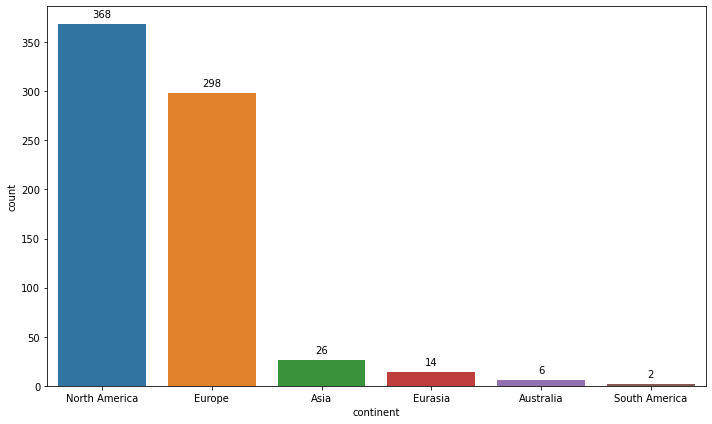

In [135]:
print(nobel.continent.value_counts())
plt.figure(figsize=(10,6))
ax=sns.countplot(x=nobel.continent,order=nobel.continent.value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+10), ha='center', va='center', color='black', size=10)
plt.show()

It can be seen that the highest number of award winners are from North America while the fewest are from South America.

### Awardees still alive

In [57]:
nobelAge[nobelAge['died'].isnull()].shape[0]

317

In [58]:
nobelAge[nobelAge['died'].isnull()]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,year,category,share,motivation,name,city,country,bornYear,Age,ageGroups
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,...,2015,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1930,85,80-90
6,773,Shirin,Ebadi,6/21/1947,NaN,Iran,IR,Hamadan,NaN,NaN,...,2003,peace,1.0,"""for her efforts for democracy and human right...",NaN,NaN,NaN,1947,56,50-60
9,782,Elfriede,Jelinek,10/20/1946,NaN,Austria,AT,M�rzzuschlag,NaN,NaN,...,2004,literature,1.0,"""for her musical flow of voices and counter-vo...",NaN,NaN,NaN,1946,58,50-60
10,553,Aung San Suu Kyi,NaN,6/19/1945,NaN,Burma (now Myanmar),MM,Rangoon (now Yangon),NaN,NaN,...,1991,peace,1.0,"""for her non-violent struggle for democracy an...",NaN,NaN,NaN,1945,46,40-50
12,924,Svetlana,Alexievich,5/31/1948,NaN,Ukraine,UA,Ivano-Frankivsk,NaN,NaN,...,2015,literature,1.0,"""for her polyphonic writings, a monument to su...",NaN,NaN,NaN,1948,67,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,546,Desmond Mpilo,Tutu,10/7/1931,NaN,South Africa,ZA,Klerksdorp,NaN,NaN,...,1984,peace,1.0,NaN,NaN,NaN,NaN,1931,53,50-60
869,541,Adolfo,P_rez Esquivel,11/26/1931,NaN,Argentina,AR,Buenos Aires,NaN,NaN,...,1980,peace,1.0,NaN,NaN,NaN,NaN,1931,49,40-50
870,551,The 14th Dalai Lama (Tenzin Gyatso),NaN,7/6/1935,NaN,Tibet (now People's Republic of China),CN,Taktser,NaN,NaN,...,1989,peace,1.0,NaN,NaN,NaN,NaN,1935,54,50-60
871,545,Lech,Walesa,9/29/1943,NaN,Poland,PL,Popowo,NaN,NaN,...,1983,peace,1.0,NaN,NaN,NaN,NaN,1943,40,30-40


It appears that, of the 972 recipients 317 people are still alive.

In [59]:
nobelAge['currentAge']=nobelAge['died']
nobelAge['currentAge'] = np.where(~nobelAge['died'].isnull(),0 , 2020-nobelAge['bornYear'])
nobelAge.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,category,share,motivation,name,city,country,bornYear,Age,ageGroups,currentAge
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,economics,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,1933,76,70-80,0
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,...,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,1933,76,70-80,0
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,...,peace,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,1940,64,60-70,0
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,...,chemistry,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom,1910,54,50-60,0
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,...,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1930,85,80-90,90


In [139]:
nobelAge[nobelAge['currentAge']>0]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,category,share,motivation,name,city,country,bornYear,Age,ageGroups,currentAge
4,918,Youyou,Tu,12/30/1930,NaN,China,CN,Zhejiang Ningbo,NaN,NaN,...,medicine,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China,1930,85,80-90,90
6,773,Shirin,Ebadi,6/21/1947,NaN,Iran,IR,Hamadan,NaN,NaN,...,peace,1.0,"""for her efforts for democracy and human right...",NaN,NaN,NaN,1947,56,50-60,73
9,782,Elfriede,Jelinek,10/20/1946,NaN,Austria,AT,M�rzzuschlag,NaN,NaN,...,literature,1.0,"""for her musical flow of voices and counter-vo...",NaN,NaN,NaN,1946,58,50-60,74
10,553,Aung San Suu Kyi,NaN,6/19/1945,NaN,Burma (now Myanmar),MM,Rangoon (now Yangon),NaN,NaN,...,peace,1.0,"""for her non-violent struggle for democracy an...",NaN,NaN,NaN,1945,46,40-50,75
12,924,Svetlana,Alexievich,5/31/1948,NaN,Ukraine,UA,Ivano-Frankivsk,NaN,NaN,...,literature,1.0,"""for her polyphonic writings, a monument to su...",NaN,NaN,NaN,1948,67,60-70,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,546,Desmond Mpilo,Tutu,10/7/1931,NaN,South Africa,ZA,Klerksdorp,NaN,NaN,...,peace,1.0,NaN,NaN,NaN,NaN,1931,53,50-60,89
869,541,Adolfo,P_rez Esquivel,11/26/1931,NaN,Argentina,AR,Buenos Aires,NaN,NaN,...,peace,1.0,NaN,NaN,NaN,NaN,1931,49,40-50,89
870,551,The 14th Dalai Lama (Tenzin Gyatso),NaN,7/6/1935,NaN,Tibet (now People's Republic of China),CN,Taktser,NaN,NaN,...,peace,1.0,NaN,NaN,NaN,NaN,1935,54,50-60,85
871,545,Lech,Walesa,9/29/1943,NaN,Poland,PL,Popowo,NaN,NaN,...,peace,1.0,NaN,NaN,NaN,NaN,1943,40,30-40,77


In [62]:
nobelAge['currentAge'].value_counts()

0      612
77      16
80      16
84      14
87      13
79      13
76      13
90      11
89      11
82      11
81      11
73      11
91      10
72      10
83      10
88       8
78       8
74       8
94       7
86       7
69       7
70       6
93       6
92       6
75       6
68       5
71       5
96       5
65       5
58       5
61       4
85       4
95       4
97       4
98       4
67       4
63       3
99       3
60       3
59       3
100      2
51       2
102      2
66       2
64       2
41       1
46       1
48       1
53       1
23       1
62       1
57       1
Name: currentAge, dtype: int64

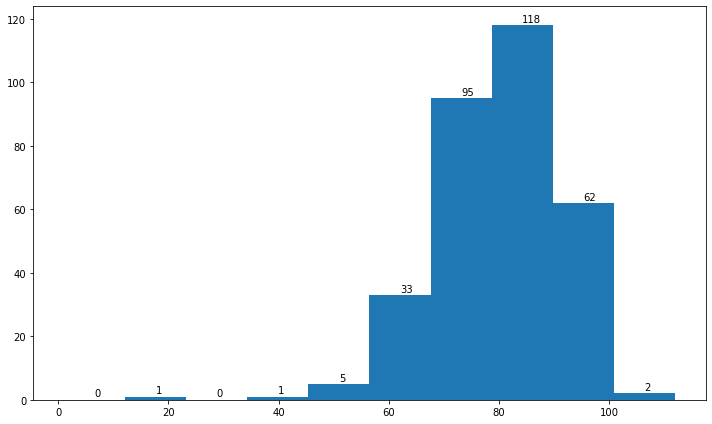

In [140]:
plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = True

_, _, patches = plt.hist(nobelAge.currentAge,range=[1,nobelAge.currentAge.max()+10])

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 1
   plt.text(x, y, int(pp._y1))

plt.show()

Of the award recipients who are alive, most(118 out of 317) are now in the age group 80-90.